<a href="https://colab.research.google.com/github/yaminimasand/BookRecommendation/blob/main/Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df = pd.read_csv('book_final_mlproject.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  float64
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [4]:
unwanted_cols = ['isbn','isbn13','publication_date','publisher']
for cols in unwanted_cols:
    df = df.drop(columns=[cols])
df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164


In [5]:
print(df.shape)

(11123, 8)


In [6]:
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')


In [7]:
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

In [8]:
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   language_code       11123 non-null  object 
 5   num_pages           11123 non-null  int64  
 6   ratings_count       11123 non-null  int64  
 7   text_reviews_count  11123 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 695.3+ KB


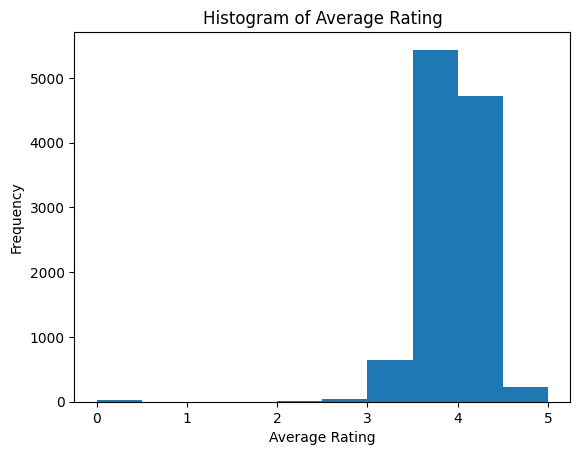

In [10]:
# Create a histogram
df['average_rating'].plot.hist(bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Rating')
plt.show()

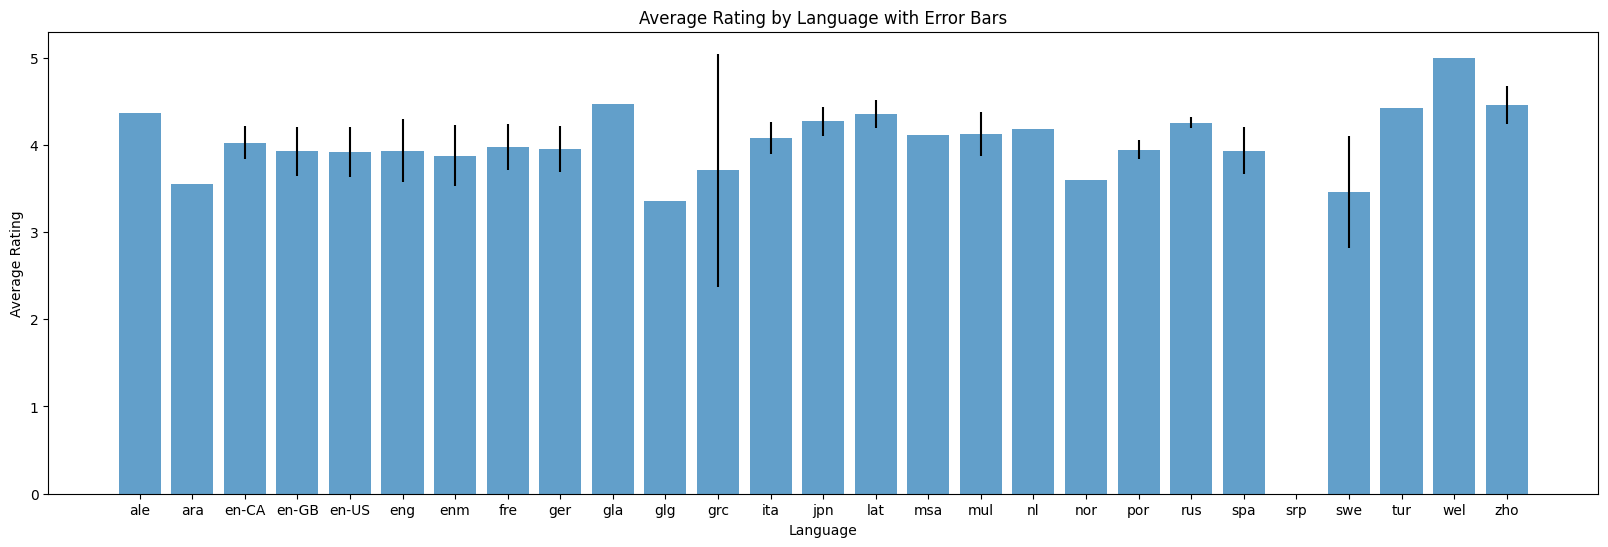

In [11]:
# Calculate mean and standard deviation
language_stats = df.groupby('language_code')['average_rating'].agg(['mean', 'std'])

# Create a bar plot with error bars
plt.figure(figsize=(20, 6))
x = np.arange(len(language_stats))
plt.bar(x, language_stats['mean'], yerr=language_stats['std'], alpha=0.7)
plt.xticks(x, language_stats.index)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Average Rating by Language with Error Bars')
plt.show()

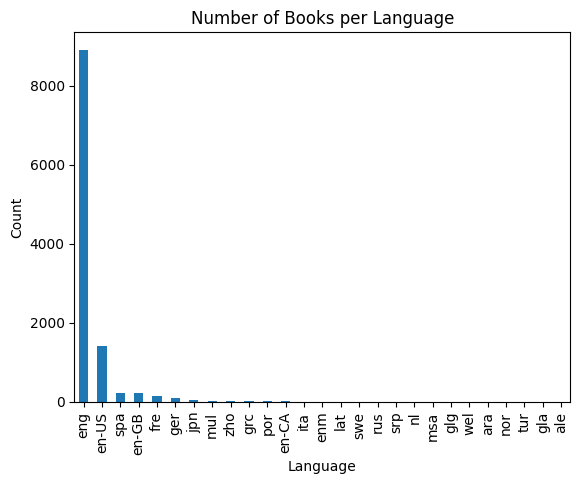

In [12]:
# Create a bar plot
language_counts = df['language_code'].value_counts()
language_counts.plot.bar()
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Number of Books per Language')
plt.show()

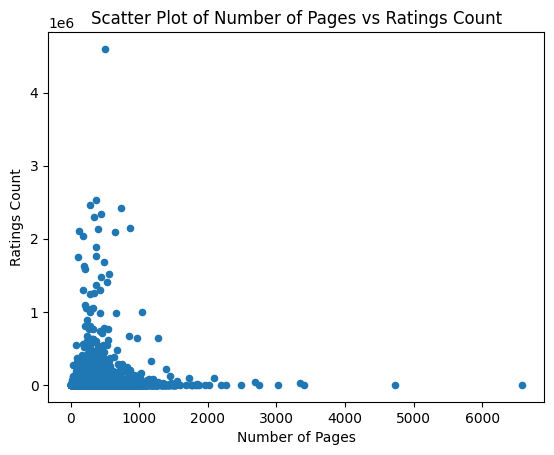

In [13]:
# Create a scatter plot
df.plot.scatter(x='num_pages', y='ratings_count')
plt.xlabel('Number of Pages')
plt.ylabel('Ratings Count')
plt.title('Scatter Plot of Number of Pages vs Ratings Count')
plt.show()

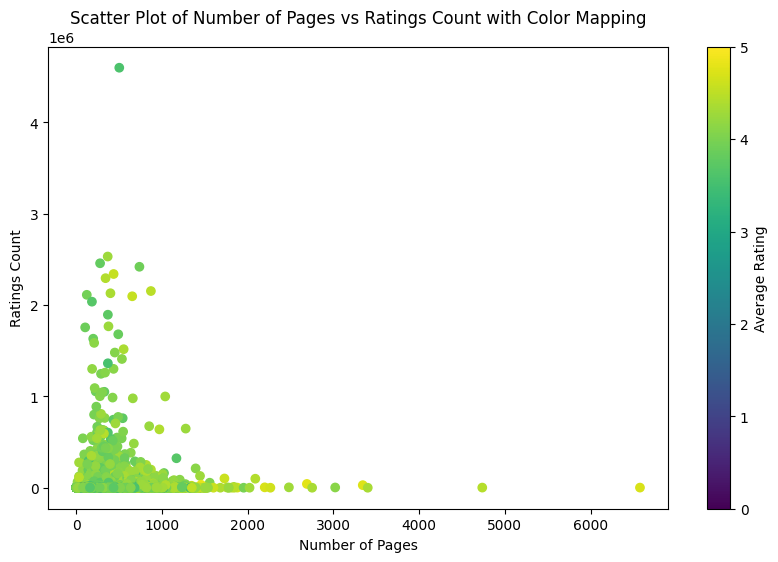

In [16]:
# Create a scatter plot with color mapping
plt.figure(figsize=(10, 6))
plt.scatter(df['num_pages'], df['ratings_count'], c=df['average_rating'], cmap='viridis')
plt.colorbar(label='Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Ratings Count')
plt.title('Scatter Plot of Number of Pages vs Ratings Count with Color Mapping')
plt.show()

Encoding

In [17]:
label_encoder = LabelEncoder()

# Encode the 'language_code' column
df['encoded_language'] = label_encoder.fit_transform(df['language_code'].copy())

# Get all unique language codes and their encoded values
unique_languages = df[['language_code', 'encoded_language']].drop_duplicates()

# Print the unique language codes and their encoded values
print(unique_languages)

      language_code  encoded_language
0               eng                 5
5             en-US                 4
50              fre                 7
109             spa                21
218           en-GB                 3
223             mul                16
451             grc                11
811             enm                 6
846           en-CA                 2
865             ger                 8
872             jpn                13
1247            ara                 1
1514             nl                17
1720            zho                26
2177            lat                14
2187            por                19
2758            srp                22
3894            ita                12
4934            rus                20
5917            msa                15
6147            glg                10
6775            wel                25
8025            swe                23
8489            nor                18
10345           tur                24
10674       

In [18]:
df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,encoded_language
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   language_code       11123 non-null  object 
 5   num_pages           11123 non-null  int64  
 6   ratings_count       11123 non-null  int64  
 7   text_reviews_count  11123 non-null  int64  
 8   encoded_language    11123 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 782.2+ KB


In [20]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'encoded_language'],
      dtype='object')

Model - K Nearest Neighbour

In [21]:
data_K = df[['encoded_language', 'average_rating', 'ratings_count', 'text_reviews_count']]

In [22]:
from sklearn.neighbors import NearestNeighbors
model1 = NearestNeighbors(metric = 'euclidean', algorithm = 'ball_tree')
model1.fit(data_K)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [24]:
distances, indices = model1.kneighbors(data_K[['encoded_language', 'average_rating', 'ratings_count', 'text_reviews_count']], n_neighbors = 6)  # 6 because the first nearest neighbor is itself and the remaining 5 are the nearest neighbors

for i in range(len(indices)):
    book_index = df.index[indices[i]] # indices[i] gives the index of the book in the train_data dataframe
    print(df.iloc[book_index, :]) # prints the book details of the book at the book_index

Streaming output truncated to the last 5000 lines.
804                Xavier de C./Xavier de C./Joseph Rowe            4.67   
10940   Michael      Casey/Redwood Kardon/Douglas Hansen            4.67   
5474                                          NOT A BOOK            5.00   
5535   Tara McCarthy/Drew Hires/Jaime Lucero/Vincent ...            4.33   
2250                      Roger Hargreaves/Gray Jolliffe            4.33   
2249                      Roger Hargreaves/Gray Jolliffe            4.33   

      language_code  num_pages  ratings_count  text_reviews_count  \
804             eng        144              3                   0   
10940           eng         29              3                   0   
5474            eng          2              3                   0   
5535            eng         88              3                   0   
2250            eng         32              3                   0   
2249            eng         32              3                   0   

       e

In [25]:
print(indices.flatten())
print(distances.flatten())
print(indices)

[   0 2114   23 ... 8740 3297 5367]
[0.00000000e+00 1.61949065e+04 3.60502810e+04 ... 6.08461174e+00
 9.22581162e+00 1.41778736e+01]
[[    0  2114    23     1  2116  4415]
 [    1    23  2114     0  2116  4415]
 [    2 10615 10031  8365  9624  7442]
 ...
 [11120  2842  9526  5566  1714  1239]
 [11121  3974  4444  8854  1403  8410]
 [11122  5930 11031  8740  3297  5367]]


In [26]:
print(df.shape)

(11123, 9)


In [27]:
final_data = df.copy()
final_data['indices'] = indices.tolist()
final_data['distances'] = distances.tolist()
final_data.head(2)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,encoded_language,indices,distances
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,5,"[0, 2114, 23, 1, 2116, 4415]","[0.0, 16194.906495858504, 36050.28095652099, 5..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,5,"[1, 23, 2114, 0, 2116, 4415]","[0.0, 28785.192895252585, 41419.51020127592, 5..."


Making suggestion based on inputs

In [28]:
import re
class BookQuest:
    def __init__(self, dataframe, indices):
        self.df = dataframe
        self.indices = indices
        self.all_books_names = list(self.df["title"].values)

    def find_id(self,name):
        for index,string in enumerate(self.all_books_names):
            if re.search(name,string):
                index=index;
                break;
        return(index)

    def print_similar_books(self, query=None):
        if query:
            found_id = self.find_id(query)
            for id in self.indices[found_id][1:]:
                print(self.df.iloc[id]["title"])

In [29]:
recsys = BookQuest(df,final_data.indices)
recsys.print_similar_books("Notes from a Small Island")

A Room of One's Own
Bitten (Otherworld  #1)
Bleak House
Saving the World and Other Extreme Sports (Maximum Ride  #3)
After Dark
